In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
#read the dataset
df = pd.read_csv("cars.csv")
#calculate voloumn from the dataset
df["Volume"] = df["Dimensions.Height"] * df["Dimensions.Length"] * df["Dimensions.Width"]

selected_columns = [
    "Volume",
    "Engine Information.Driveline",
    "Engine Information.Number of Forward Gears",
    "Fuel Information.Fuel Type",
    "Identification.Classification",
    "Identification.ID",
    "Engine Information.Engine Statistics.Horsepower"
]
X = df[selected_columns]
y = df["Fuel Information.City mpg"]


In [9]:
#Handle Categorical Variables (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on Test Data
y_pred = model.predict(X_test)

# Model Performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

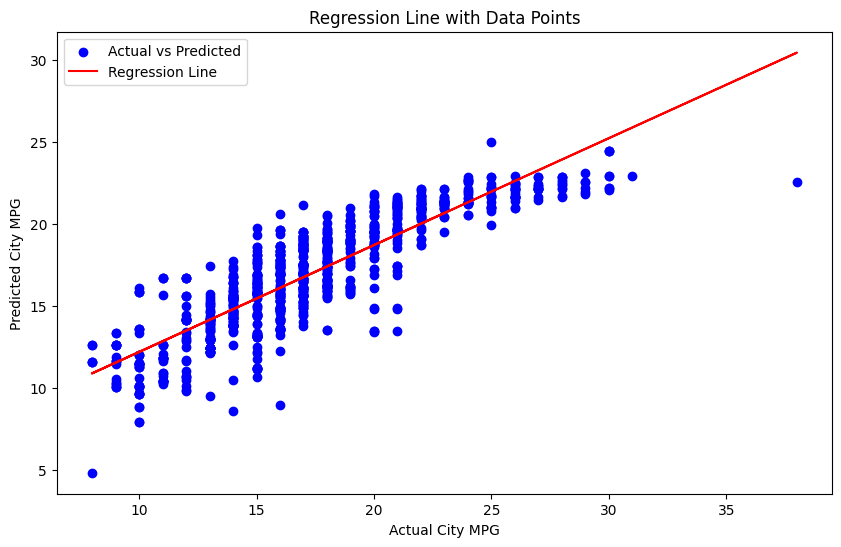

In [ ]:

#Plot Regression Line and Data Points
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(y_test, y_pred, color="blue", label="Actual vs Predicted")

# Best-fit regression line
m, b = np.polyfit(y_test, y_pred, 1)  # Fit line y = mx + b
plt.plot(y_test, m*y_test + b, color="red", label="Regression Line")

plt.xlabel("Actual City MPG")
plt.ylabel("Predicted City MPG")
plt.title("Regression Line with Data Points")
plt.legend()
plt.show()
